In [2]:
%matplotlib inline

import networkx as nx
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

In [4]:
def powerlaw(D, lamb, p0):
    x = np.arange(1,D)
    x = np.asarray(x, dtype=float)
    x = x**(-lamb)
    x = x/x.sum(axis=0)*(1-p0)
    x = np.insert(x, 0, p0, axis=0)
    return x

In [148]:
N = 100
D = 10
B = 10

lambi = 5
lambo = 5 

In [149]:
din = np.random.choice(np.arange(D), N, replace=True, p=powerlaw(D,lambi, 0.0))
dou = np.random.choice(np.arange(D), N, replace=True, p=powerlaw(D,lambo, 0.0))

if din.sum() < dou.sum() :
    din[N-1] = din[N-1] + dou.sum() - din.sum()
    np.random.shuffle(din)
elif din.sum() > dou.sum():
    dou[N-1] = dou[N-1] + din.sum() - dou.sum()
    np.random.shuffle(dou)

In [150]:
G=nx.directed_configuration_model(list(din),list(dou))
G=nx.DiGraph(G)
G.remove_edges_from(G.selfloop_edges())

In [151]:
clean = set(np.arange(N))
infected = set()

node2Group = np.repeat(np.arange(B), N/B)
np.random.shuffle(node2Group)   

infected = set(np.where(node2Group ==0)[0])
clean = set(np.arange(N)) - infected

In [152]:
downstream = set()
for n in infected:
    downstream.update(set(G.successors(n)))

H = G.to_directed()
H.remove_nodes_from(infected)
hscc = nx.strongly_connected_components_recursive(H)


shoreparty = set()
for comp in hscc:
    if len(set.intersection(comp, downstream))>0:
        shoreparty.update(comp)


H.remove_nodes_from(shoreparty)
hscc2 = nx.strongly_connected_components_recursive(H)


In [153]:
len(infected)

10

In [154]:
for g in range(B):
    cleangroup = set(np.where(node2Group ==g)[0]) - shoreparty - infected
    if len(cleangroup) > 0:
        for comp in hscc2:
            if cleangroup == comp:
                infected = infected | set(np.where(node2Group ==g)[0])
                clean = clean - set(np.where(node2Group ==g)[0])
                break
    elif len(cleangroup) == 0:
        infected = infected | set(np.where(node2Group ==g)[0])
        clean = clean - set(np.where(node2Group ==g)[0])


In [155]:
len(infected)

10

In [146]:
{1,2} | {1,3}

{1, 2, 3}

In [147]:
#nx.set_node_attributes(G, 'state', 0)
#nx.set_node_attributes(G, 'group', 0)
#Group = np.repeat(np.arange(B), N/B)
#np.random.shuffle(Group)
#for n in G:
    #G.add_node(n, group=Group[n])

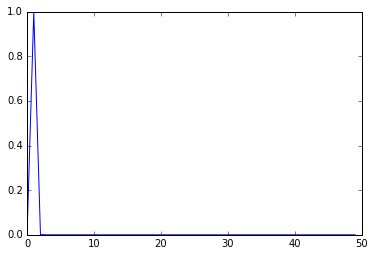

In [127]:
plt.plot(np.arange(D), powerlaw(D, lambi, 0.0))